In [290]:
import pandas as pd
import numpy as np
import os

# File Paths
DATA_PATH = '/Users/user/Desktop/Data Science Projects/ADHD_Divorce/Data/Data_2022-2023.csv'
RESULTS_PATH = '/Users/user/Desktop/Data Science Projects/ADHD_Divorce/results/'

# Ensure Results Directory Exists
os.makedirs(RESULTS_PATH, exist_ok=True)

# Load the Data
def load_and_clean_data(file_path):
    data = pd.read_csv(file_path)
    print(f'Initial Data Loaded: {data.shape[0]} rows, {data.shape[1]} columns')

    # Filtering Only Relevant Values for ADHD and Anxiety (Severity 1, 2, 3)
    data = data[(data['ADHDSevInd_2223'].isin([1, 2, 3])) & (data['anxiety_2223'].isin([1, 2, 3]))]

    # Removing Missing Values (99, 95, 90) in All Relevant Columns
    data.replace([99, 95, 90], np.nan, inplace=True)

    # Dropping rows only if critical columns are missing
    data.dropna(subset=['ADHDSevInd_2223', 'anxiety_2223'], inplace=True)

    # Renaming Columns for Clarity
    data.rename(columns={'ADHDSevInd_2223': 'ADHD_Severity', 'anxiety_2223': 'Anxiety_Severity'}, inplace=True)

    # Identifying Relevant Columns based on Codebook
    relevant_columns = [
        'ADHD_Severity', 'Anxiety_Severity', 'age5_2223', 'sex_2223', 'MotherMH_2223', 'FatherMH_2223',
        'smoking_2223', 'ScreenTime_2223', 'HrsSleep_2223', 'ACEdivorce_2223', 'PhysAct_2223',
        'bully_2223', 'bullied_2223', 'argue_2223', 'MakeFriend_2223', 'SchlEngage_2223', 
        'SmkInside_2223', 'vape_2223', 'ShareIdeas_2223', 'MealTogether_2223', 'FamResilience_2223',
        'ACE2more_2223', 'ParAggrav_2223', 'EmSupport_2223', 'ParCoping_2223', 'BedTime_2223', 
        'SchlMiss_2223', 'AftSchAct_2223'
    ]

    data = data[relevant_columns]

    # Handling Missing Values:
    # Ordinal Columns (Categorical with meaningful order)
    ordinal_cols = [
        'SmkInside_2223', 'MealTogether_2223', 'ParAggrav_2223', 'ParCoping_2223', 
        'MotherMH_2223', 'FatherMH_2223', 'PhysAct_2223', 'bully_2223', 'bullied_2223',
        'argue_2223', 'MakeFriend_2223', 'age5_2223', 'ScreenTime_2223', 'BedTime_2223'
    ]

    # Binary Variables
    binary_cols = ['HrsSleep_2223', 'ACEdivorce_2223', 'EmSupport_2223', 'vape_2223']

    # Non-Ordinal Categorical Columns
    categorical_cols = ['sex_2223', 'smoking_2223', 'ShareIdeas_2223', 
                        'SchlEngage_2223', 'SchlMiss_2223', 'AftSchAct_2223']

    # Creating Missing Indicator Columns for All Variables
    for col in ordinal_cols + binary_cols + categorical_cols:
        if data[col].isnull().sum() > 0:
            data[col + '_Missing'] = data[col].isnull().astype(int)
    
    # Imputing Missing Values:
    for col in ordinal_cols + binary_cols + categorical_cols:
        if data[col].isnull().sum() > 0:
            data[col].fillna(data[col].mode()[0], inplace=True)

    # Final Check for Remaining NaNs
    rows_with_nan = data[data.isnull().any(axis=1)]
    if not rows_with_nan.empty:
        print("\n⚠️ Rows with NaN Values Found After Cleaning:")
        print(rows_with_nan)
    else:
        print("\n✅ No Rows with NaN Values Found in the Final Cleaned Data.")

    # Save the Cleaned Data (No Encoding or Scaling)
    cleaned_data_path = RESULTS_PATH + 'cleaned_data.csv'
    data.to_csv(cleaned_data_path, index=False)
    print(f'Cleaned Data Saved: {cleaned_data_path}')

    # Save a Shortened Version (50 Rows)
    sample_data_path = RESULTS_PATH + 'head_cleaned_data.csv'
    data.head(50).to_csv(sample_data_path, index=False)
    print(f'Sample Data (50 Rows) Saved: {sample_data_path}')

    return data

# Test the Cleaning Function
if __name__ == '__main__':
    cleaned_data = load_and_clean_data(DATA_PATH)
    print(f'Final Cleaned Data: {cleaned_data.shape[0]} rows, {cleaned_data.shape[1]} columns')


/var/folders/_l/tp947cjd33lgn2d6cv9xdzth0000gn/T/ipykernel_64952/2579049630.py:14: DtypeWarning: Columns (97,155,156,253,254,260,261,354,355) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


Initial Data Loaded: 109265 rows, 892 columns


/var/folders/_l/tp947cjd33lgn2d6cv9xdzth0000gn/T/ipykernel_64952/2579049630.py:64: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)



⚠️ Rows with NaN Values Found After Cleaning:
        ADHD_Severity  Anxiety_Severity  age5_2223  sex_2223  MotherMH_2223  \
44                  1                 1          5         2            1.0   
161                 1                 3          4         2            1.0   
169                 3                 1          5         1            1.0   
175                 1                 1          4         2            1.0   
389                 2                 1          3         2            1.0   
...               ...               ...        ...       ...            ...   
109057              1                 3          5         2            1.0   
109124              1                 1          5         1            1.0   
109165              1                 1          2         2            1.0   
109190              1                 1          3         2            1.0   
109263              1                 1          2         1            3.0   

    

In [291]:
rows_with_nan = cleaned_data[cleaned_data.isnull().any(axis=1)]
print(rows_with_nan)
cleaned_data['ScreenTime_2223']

        ADHD_Severity  Anxiety_Severity  age5_2223  sex_2223  MotherMH_2223  \
44                  1                 1          5         2            1.0   
161                 1                 3          4         2            1.0   
169                 3                 1          5         1            1.0   
175                 1                 1          4         2            1.0   
389                 2                 1          3         2            1.0   
...               ...               ...        ...       ...            ...   
109057              1                 3          5         2            1.0   
109124              1                 1          5         1            1.0   
109165              1                 1          2         2            1.0   
109190              1                 1          3         2            1.0   
109263              1                 1          2         1            3.0   

        FatherMH_2223  smoking_2223  ScreenTime_222

0         4.0
1         5.0
2         4.0
3         4.0
4         5.0
         ... 
109258    3.0
109260    4.0
109261    2.0
109263    3.0
109264    5.0
Name: ScreenTime_2223, Length: 89500, dtype: float64

In [294]:
import pandas as pd
import numpy as np
import os

# File Paths
CLEANED_DATA_PATH = '/Users/user/Desktop/Data Science Projects/ADHD_Divorce/results/cleaned_data.csv'
RESULTS_PATH = '/Users/user/Desktop/Data Science Projects/ADHD_Divorce/results/'

# Ensure Results Directory Exists
os.makedirs(RESULTS_PATH, exist_ok=True)

# Load the Cleaned Data
def load_cleaned_data(file_path):
    data = pd.read_csv(file_path)
    print(f'Loaded Cleaned Data: {data.shape[0]} rows, {data.shape[1]} columns')
    return data

# Feature Engineering Function
def feature_engineering(data):
    print("\n✅ Starting Feature Engineering...")

    # Feature 1: Adequate_Sleep (Binary)
    def calculate_adequate_sleep(row):
        if row['age5_2223'] in [1] and 12 <= row['HrsSleep_2223'] <= 16:
            return 1
        elif row['age5_2223'] in [2] and 11 <= row['HrsSleep_2223'] <= 14:
            return 1
        elif row['age5_2223'] in [3] and 10 <= row['HrsSleep_2223'] <= 13:
            return 1
        elif row['age5_2223'] in [4] and 9 <= row['HrsSleep_2223'] <= 12:
            return 1
        elif row['age5_2223'] in [5] and 8 <= row['HrsSleep_2223'] <= 10:
            return 1
        else:
            return 0

    data['Adequate_Sleep'] = data.apply(calculate_adequate_sleep, axis=1)

    # Feature 2: Family Stability Score (Ordinal)
    data['Family_Stability_Score'] = (
        data['MealTogether_2223'] +     # Higher value means more family meals (more stability)
        (4 - data['ParAggrav_2223']) +  # Higher value means less parental aggravation (more stability)
        data['ParCoping_2223']          # Higher value means better parental coping (more stability)
    )

    # Feature 3: One-Hot Encoding Non-Ordinal Categorical Variables
    categorical_cols = ['sex_2223', 'smoking_2223', 'ShareIdeas_2223', 
                        'SchlEngage_2223', 'SchlMiss_2223', 'AftSchAct_2223']

    data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

    # Saving the Fully Engineered Data
    engineered_data_path = RESULTS_PATH + 'engineered_data.csv'
    data.to_csv(engineered_data_path, index=False)
    print(f'\n✅ Fully Engineered Data Saved: {engineered_data_path}')

    # Save a Shortened Version (50 Rows)
    sample_data_path = RESULTS_PATH + 'head_engineered_data.csv'
    data.head(50).to_csv(sample_data_path, index=False)
    print(f'Sample Data (50 Rows) Saved: {sample_data_path}')

    return data

# Run Feature Engineering Process
if __name__ == '__main__':
    cleaned_data = load_cleaned_data(CLEANED_DATA_PATH)
    engineered_data = feature_engineering(cleaned_data)
    print(f'\n✅ Final Engineered Data: {engineered_data.shape[0]} rows, {engineered_data.shape[1]} columns')


Loaded Cleaned Data: 89500 rows, 50 columns

✅ Starting Feature Engineering...

✅ Fully Engineered Data Saved: /Users/user/Desktop/Data Science Projects/ADHD_Divorce/results/engineered_data.csv
Sample Data (50 Rows) Saved: /Users/user/Desktop/Data Science Projects/ADHD_Divorce/results/head_engineered_data.csv

✅ Final Engineered Data: 89500 rows, 58 columns


In [297]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np

def automated_feature_selection(data_path, target=str()):
    """
    Automated Feature Selection Function with Enhanced Debugging.

    Parameters:
    - data_path: str - The path to the cleaned dataset
    - target: str - The target column name (default 'ADHD_Severity')

    Returns:
    - pd.DataFrame - The dataset with selected features
    """
    print("\n🔍 Starting Automated Feature Selection...")

    # Loading the cleaned dataset
    try:
        data = pd.read_csv(data_path)
        print(f"\n✅ Loaded cleaned dataset from: {data_path}")
    except FileNotFoundError:
        raise ValueError(f"❌ The specified data path '{data_path}' does not exist.")

    # Verify target column exists
    if target not in data.columns:
        raise ValueError(f"❌ Target column '{target}' does not exist in the dataset.")
    
    # # Exclude Anxiety_Severity if it exists
    # if 'Anxiety_Severity' in data.columns:
    #     data.drop(columns=['Anxiety_Severity'], inplace=True)
    #     print("\n✅ Excluded 'Anxiety_Severity' from features.")

    # Separate features and target variable
    X = data.drop(columns=[target], errors='ignore')
    y = data[target]

    # Debugging: Checking if the target variable has missing values
    if y.isnull().sum() > 0:
        print(f"⚠️ Missing values in target column '{target}': {y.isnull().sum()}. Filling with mode.")
        y.fillna(y.mode()[0], inplace=True)

    # Handling Missing Values in Features
    X.fillna(X.median(numeric_only=True), inplace=True)
    X.fillna(X.mode().iloc[0], inplace=True)

    # Debugging: Checking for empty features
    if X.empty:
        raise ValueError("❌ No features available after separating target.")

    # Automatically Encoding Categorical Columns
    categorical_cols = X.select_dtypes(include=['object', 'category']).columns
    label_encoder = LabelEncoder()
    for col in categorical_cols:
        X[col] = label_encoder.fit_transform(X[col])
    print(f"\n✅ Categorical columns encoded: {list(categorical_cols)}")

    # Scaling features for better performance
    scaler = StandardScaler()
    X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

    # Debugging: Verifying X_scaled is not empty
    if X_scaled.empty:
        raise ValueError("❌ No valid features available after scaling.")

    # Debugging: Checking for zero variance columns (constant features)
    zero_variance_features = X_scaled.columns[X_scaled.var() == 0].tolist()
    if zero_variance_features:
        print(f"\n⚠️ Removing zero variance features: {zero_variance_features}")
        X_scaled.drop(columns=zero_variance_features, inplace=True)

    ### 1. Correlation Analysis (Spearman)
    correlation_matrix = X_scaled.corr(method='spearman')
    
    print(f"\n🔍 Initial Feature Count: {X_scaled.shape[1]}")
    
    high_correlation_features = [
        column for column in correlation_matrix.columns 
        if any(abs(correlation_matrix[column]) > 0.85) and column != target
    ]

    # Debugging: Listing the highly correlated features
    print("\n✅ Highly Correlated Features Identified (Correlation > 0.85):")
    print(high_correlation_features)

    # Dropping highly correlated features if more than 2 features remain
    if len(high_correlation_features) > 0 and X_scaled.shape[1] - len(high_correlation_features) > 2:
        X_scaled.drop(columns=high_correlation_features, inplace=True, errors='ignore')
        print(f"\n✅ Highly Correlated Features Removed: {high_correlation_features}")
    else:
        print("\n❌ Not removing highly correlated features to avoid empty DataFrame.")

    # Debugging: Displaying remaining features after correlation filtering
    print(f"\n✅ Remaining Features after Correlation Filtering: {X_scaled.shape[1]}")
    print(X_scaled.columns.tolist())

    ### 2. Mutual Information (MI)
    try:
        print("\n🔍 Debugging X_scaled before Mutual Information Calculation:")
        print(f"Shape: {X_scaled.shape}")
        print(f"Any NaN values: {X_scaled.isnull().sum().sum()}")

        if X_scaled.empty:
            raise ValueError("❌ X_scaled is empty after preprocessing.")
        
        mi = mutual_info_classif(X_scaled, y)
        mi_scores = pd.Series(mi, index=X_scaled.columns).sort_values(ascending=False)
        mi_selected_features = mi_scores[mi_scores > 0.01].index.tolist()
        print("\n✅ Selected Features by Mutual Information (MI > 0.01):")
        print(mi_selected_features)
    except ValueError as e:
        raise ValueError(f"❌ Error in Mutual Information Calculation: {e}")

    ### 3. Recursive Feature Elimination (RFE) with Logistic Regression
    lr_model = LogisticRegression(max_iter=1000)
    rfe = RFE(lr_model, n_features_to_select=10)
    rfe.fit(X_scaled, y)
    rfe_selected_features = X_scaled.columns[rfe.support_].tolist()
    print("\n✅ Top 10 Features Selected by RFE (Logistic Regression):")
    print(rfe_selected_features)

    ### 4. Random Forest Feature Importance
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_scaled, y)
    rf_feature_importance = pd.Series(rf_model.feature_importances_, index=X_scaled.columns).sort_values(ascending=False)
    rf_selected_features = rf_feature_importance[rf_feature_importance > 0.01].index.tolist()
    print("\n✅ Selected Features by Random Forest Importance (Importance > 0.01):")
    print(rf_selected_features)

    ### Automated Combined Feature Selection
    combined_features = set(mi_selected_features) & set(rfe_selected_features) & set(rf_selected_features)
    final_selected_features = list(combined_features)
    print("\n✅ Final Selected Features after Combining All Methods:")
    print(final_selected_features)

    # Creating final dataset with selected features
    X_final = X_scaled[final_selected_features]
    print("\n✅ Final Feature Selection Complete.")

    # Save the final selected features
    final_path = '/Users/user/Desktop/Data Science Projects/ADHD_Divorce/results/selected_features.csv'
    X_final.to_csv(final_path, index=False)
    print(f"\n✅ Final dataset with selected features saved at: {final_path}")

    return X_final

# Usage Example
data_path = '/Users/user/Desktop/Data Science Projects/ADHD_Divorce/results/cleaned_data.csv'
X_final = automated_feature_selection(data_path, target='ADHD_Severity')



🔍 Starting Automated Feature Selection...

✅ Loaded cleaned dataset from: /Users/user/Desktop/Data Science Projects/ADHD_Divorce/results/cleaned_data.csv

✅ Categorical columns encoded: []

🔍 Initial Feature Count: 49

✅ Highly Correlated Features Identified (Correlation > 0.85):
['Anxiety_Severity', 'age5_2223', 'sex_2223', 'MotherMH_2223', 'FatherMH_2223', 'smoking_2223', 'ScreenTime_2223', 'HrsSleep_2223', 'ACEdivorce_2223', 'PhysAct_2223', 'bully_2223', 'bullied_2223', 'argue_2223', 'MakeFriend_2223', 'SchlEngage_2223', 'SmkInside_2223', 'vape_2223', 'ShareIdeas_2223', 'MealTogether_2223', 'FamResilience_2223', 'ACE2more_2223', 'ParAggrav_2223', 'EmSupport_2223', 'ParCoping_2223', 'BedTime_2223', 'SchlMiss_2223', 'AftSchAct_2223', 'SmkInside_2223_Missing', 'MealTogether_2223_Missing', 'ParAggrav_2223_Missing', 'ParCoping_2223_Missing', 'MotherMH_2223_Missing', 'FatherMH_2223_Missing', 'PhysAct_2223_Missing', 'bully_2223_Missing', 'bullied_2223_Missing', 'argue_2223_Missing', 'Make

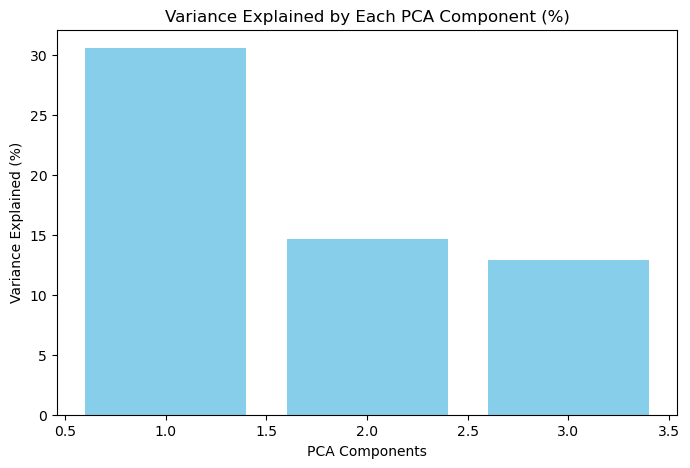

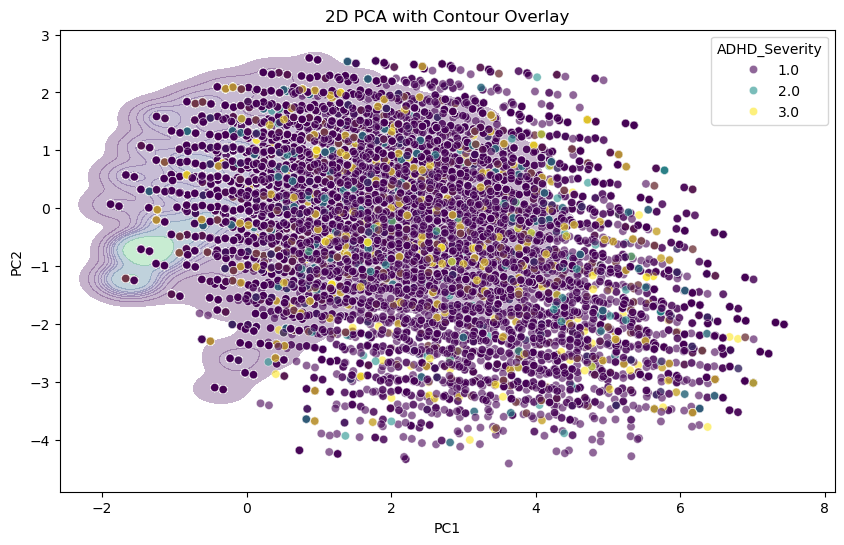

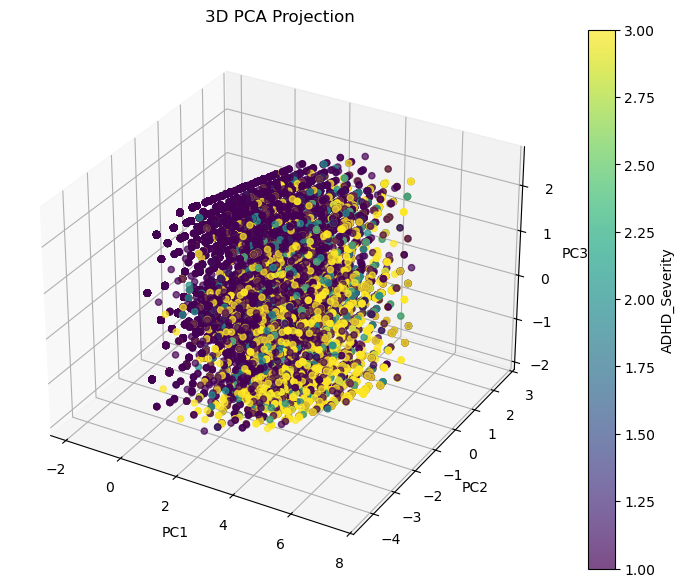

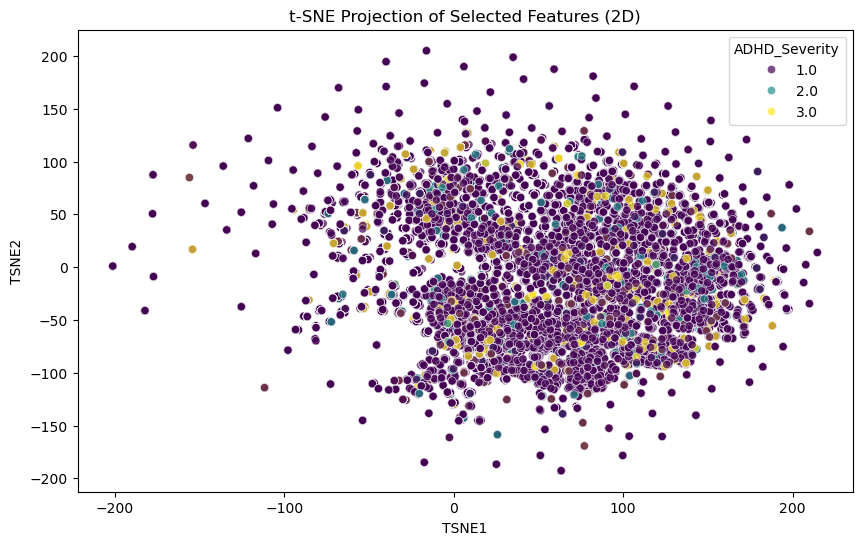

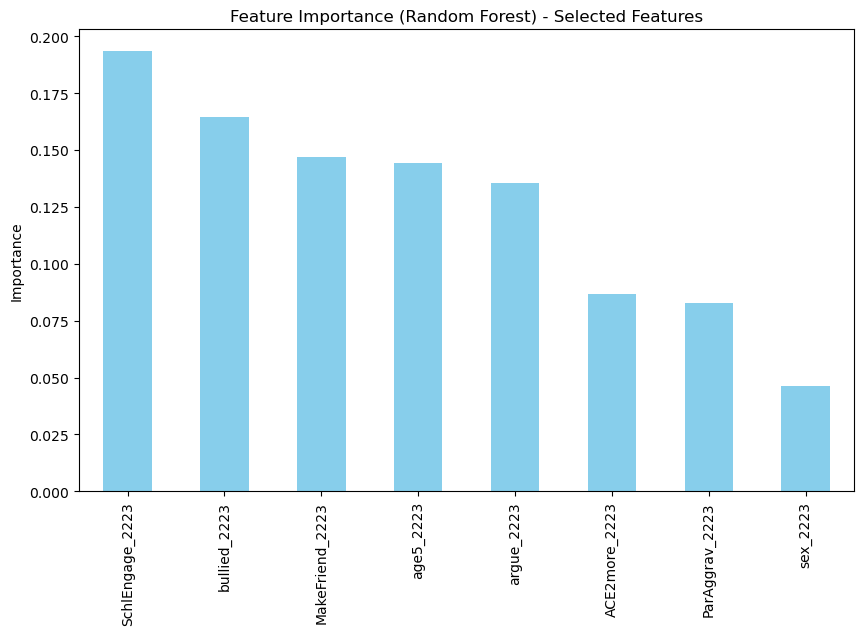


✅ Feature Importance from Random Forest:
SchlEngage_2223    0.193308
bullied_2223       0.164465
MakeFriend_2223    0.147078
age5_2223          0.144234
argue_2223         0.135432
ACE2more_2223      0.086617
ParAggrav_2223     0.082572
sex_2223           0.046295
dtype: float64


In [327]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from mpl_toolkits.mplot3d import Axes3D

# Load your cleaned dataset
data_path = '/Users/user/Desktop/Data Science Projects/ADHD_Divorce/results/cleaned_data.csv'
data = pd.read_csv(data_path)

# Selecting the specified features for EDA
selected_features = [
    'SchlEngage_2223', 'sex_2223', 'argue_2223', 
    'age5_2223', 'ParAggrav_2223', 'bullied_2223', 
    'ACE2more_2223', 'MakeFriend_2223', 'ADHD_Severity'
]

eda_data = data[selected_features].dropna()  # Dropping NaNs for simplicity
X = eda_data.drop(columns=['ADHD_Severity'])
y = eda_data['ADHD_Severity']

# Scaling the Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 1: PCA with Variance Explanation
pca = PCA(n_components=3)
pca_data = pca.fit_transform(X_scaled)
explained_variance = pca.explained_variance_ratio_

# Plotting Variance Explained by PCA
plt.figure(figsize=(8, 5))
plt.bar(range(1, 4), explained_variance * 100, color='skyblue')
plt.title('Variance Explained by Each PCA Component (%)')
plt.xlabel('PCA Components')
plt.ylabel('Variance Explained (%)')
plt.show()

# Step 2: 2D PCA Projection with Contour
pca_df_2d = pd.DataFrame(data=pca_data[:, :2], columns=['PC1', 'PC2'])
pca_df_2d['ADHD_Severity'] = y

plt.figure(figsize=(10, 6))
sns.kdeplot(x='PC1', y='PC2', data=pca_df_2d, cmap='viridis', fill=True, alpha=0.3)
sns.scatterplot(data=pca_df_2d, x='PC1', y='PC2', hue='ADHD_Severity', palette='viridis', alpha=0.6)
plt.title('2D PCA with Contour Overlay')
plt.show()

# Step 3: 3D PCA Projection
pca_df_3d = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2', 'PC3'])
pca_df_3d['ADHD_Severity'] = y

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_df_3d['PC1'], pca_df_3d['PC2'], pca_df_3d['PC3'], 
                     c=y, cmap='viridis', alpha=0.7)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D PCA Projection')
fig.colorbar(scatter, ax=ax, label='ADHD_Severity')
plt.show()

# Step 4: t-SNE Projection
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_data = tsne.fit_transform(X_scaled)

# Creating a DataFrame for t-SNE results
tsne_df = pd.DataFrame(data=tsne_data, columns=['TSNE1', 'TSNE2'])
tsne_df['ADHD_Severity'] = y

# Visualizing t-SNE
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='ADHD_Severity', palette='viridis', alpha=0.7)
plt.title('t-SNE Projection of Selected Features (2D)')
plt.show()

# Step 5: Random Forest Feature Importance
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_scaled, y)
rf_feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Displaying Feature Importance
plt.figure(figsize=(10, 6))
rf_feature_importance.plot(kind='bar', color='skyblue')
plt.title('Feature Importance (Random Forest) - Selected Features')
plt.ylabel('Importance')
plt.show()

print("\n✅ Feature Importance from Random Forest:")
print(rf_feature_importance)


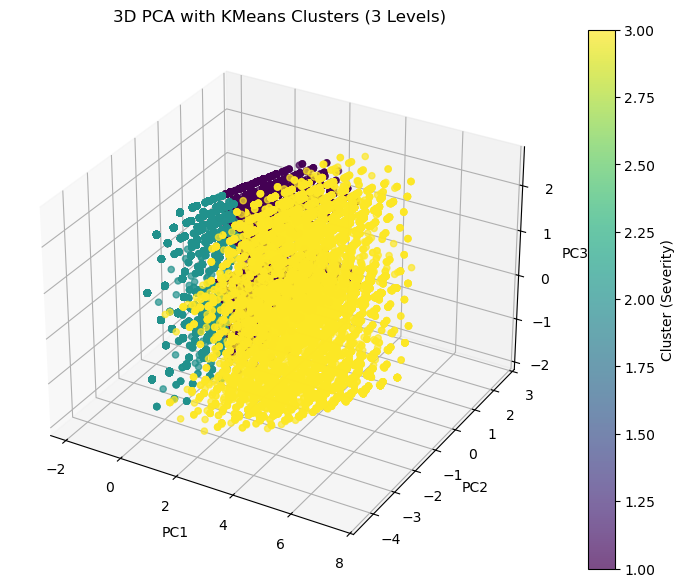

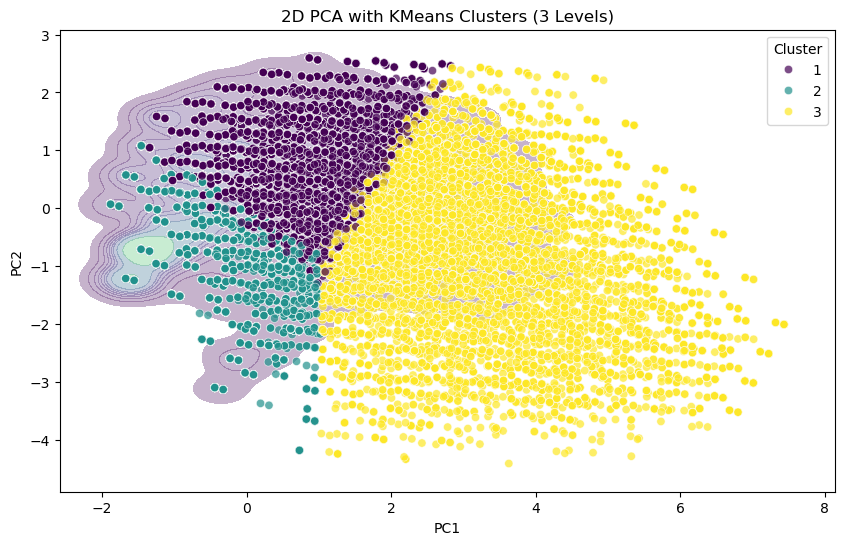


✅ Updated dataset with expanded ADHD severity saved as 'ADHD_Severity_Expanded.csv'


In [319]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

# Load your cleaned dataset
data_path = '/Users/user/Desktop/Data Science Projects/ADHD_Divorce/results/cleaned_data.csv'
data = pd.read_csv(data_path)

# Selecting the specified features for clustering
selected_features = [
    'SchlEngage_2223', 'sex_2223', 'argue_2223', 
    'age5_2223', 'ParAggrav_2223', 'bullied_2223', 
    'ACE2more_2223', 'MakeFriend_2223', 'ADHD_Severity'
]

eda_data = data[selected_features].dropna()
X = eda_data.drop(columns=['ADHD_Severity'])
y = eda_data['ADHD_Severity']

# Scaling the Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 1: PCA Transformation (3 Components for Clustering)
pca = PCA(n_components=3)
pca_data = pca.fit_transform(X_scaled)

# Step 2: KMeans Clustering (3 clusters for finer ADHD severity)
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(pca_data)

# Adding cluster labels to the original data
eda_data['ADHD_Severity_Expanded'] = cluster_labels + 1  # To make clusters from 1 to 3

# Step 3: Visualizing Clusters in 3D PCA Space
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2', 'PC3'])
pca_df['Cluster'] = cluster_labels + 1

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], 
                     c=pca_df['Cluster'], cmap='viridis', alpha=0.7)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D PCA with KMeans Clusters (3 Levels)')
fig.colorbar(scatter, ax=ax, label='Cluster (Severity)')
plt.show()

# Step 4: Visualizing Clusters in 2D PCA Space with Contour
pca_df_2d = pd.DataFrame(data=pca_data[:, :2], columns=['PC1', 'PC2'])
pca_df_2d['Cluster'] = cluster_labels + 1

plt.figure(figsize=(10, 6))
sns.kdeplot(x='PC1', y='PC2', data=pca_df_2d, cmap='viridis', fill=True, alpha=0.3)
sns.scatterplot(data=pca_df_2d, x='PC1', y='PC2', hue='Cluster', palette='viridis', alpha=0.7)
plt.title('2D PCA with KMeans Clusters (3 Levels)')
plt.show()

# Step 5: Save the updated dataset with new ADHD severity levels
eda_data.to_csv('/Users/user/Desktop/Data Science Projects/ADHD_Divorce/results/ADHD_Severity_Expanded.csv', index=False)
print("\n✅ Updated dataset with expanded ADHD severity saved as 'ADHD_Severity_Expanded.csv'")



✅ Cluster Profile (Mean Values by Feature):
ADHD_Severity_Expanded         1         2         3
SchlEngage_2223         1.799244  1.109491  2.473268
sex_2223                1.418639  1.551894  1.455099
argue_2223              3.256992  3.009273  2.191602
age5_2223               4.149043  2.160666  3.715205
ParAggrav_2223          1.998125  1.961172  1.656437
bullied_2223            1.436593  1.150030  2.751891
ACE2more_2223           1.688510  1.264802  2.188560
MakeFriend_2223         1.218379  1.019216  2.093802
ADHD_Severity           1.164102  1.046043  1.708598


/var/folders/_l/tp947cjd33lgn2d6cv9xdzth0000gn/T/ipykernel_64952/2607339452.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_sizes.index, y=cluster_sizes.values, palette='viridis')


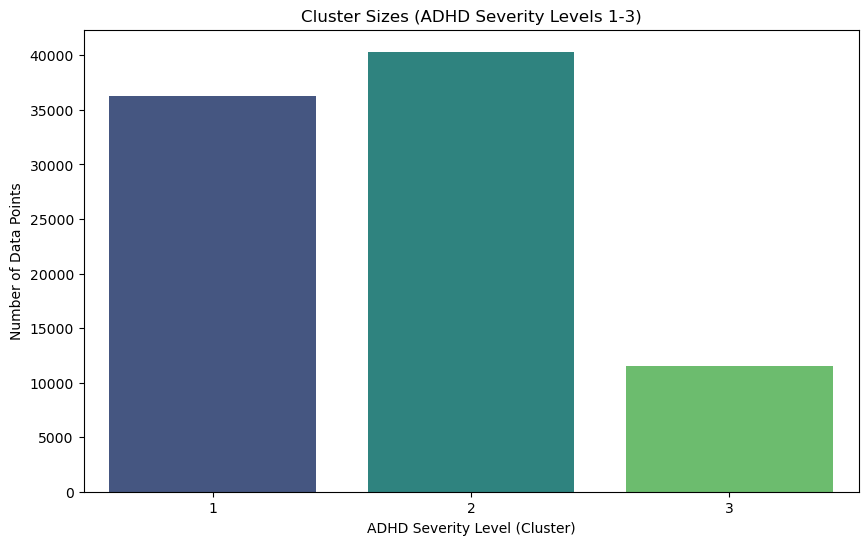

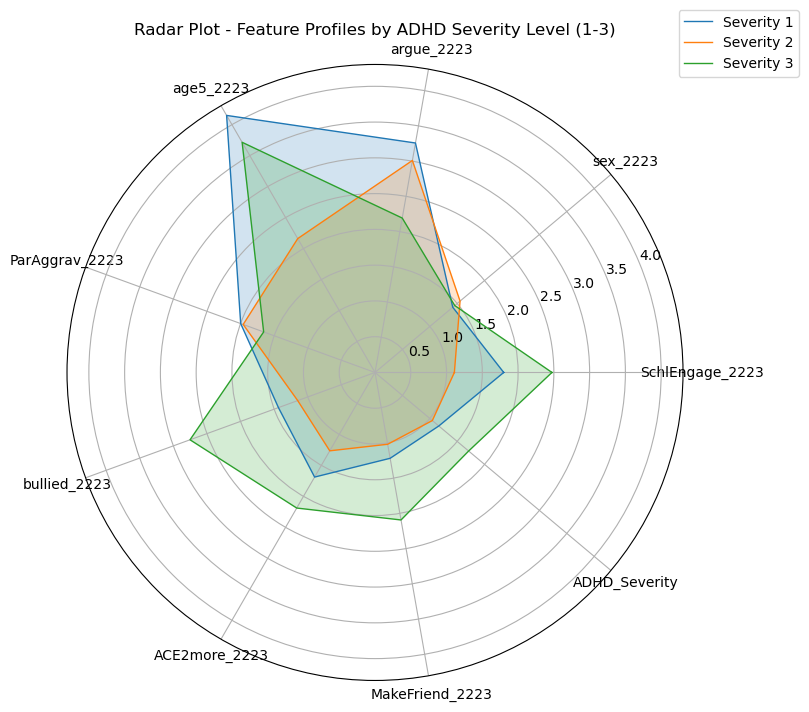

In [320]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the updated dataset with expanded ADHD severity
data = pd.read_csv('/Users/user/Desktop/Data Science Projects/ADHD_Divorce/results/ADHD_Severity_Expanded.csv')

# Step 1: Calculating Cluster Descriptive Statistics
cluster_profile = data.groupby('ADHD_Severity_Expanded').mean().T
print("\n✅ Cluster Profile (Mean Values by Feature):")
print(cluster_profile)

# Step 2: Visualizing Cluster Sizes
cluster_sizes = data['ADHD_Severity_Expanded'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_sizes.index, y=cluster_sizes.values, palette='viridis')
plt.title('Cluster Sizes (ADHD Severity Levels 1-3)')
plt.xlabel('ADHD Severity Level (Cluster)')
plt.ylabel('Number of Data Points')
plt.show()

# Step 3: Radar Plot (Spider Plot) of Cluster Feature Means
from math import pi

# Preparing data for Radar Plot
categories = list(cluster_profile.index)
num_categories = len(categories)

# Radar Plot Setup
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(polar=True))
angles = [n / float(num_categories) * 2 * pi for n in range(num_categories)]
angles += angles[:1]

# Plotting each cluster
for cluster in range(1, 4):
    values = list(cluster_profile[cluster])
    values += values[:1]  # Ensuring the loop closes
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=f'Severity {cluster}')
    ax.fill(angles, values, alpha=0.2)

# Customizing Radar Plot
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
plt.title('Radar Plot - Feature Profiles by ADHD Severity Level (1-3)')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.show()



🔧 Training Logistic Regression...

🔍 Logistic Regression Accuracy: 0.9985


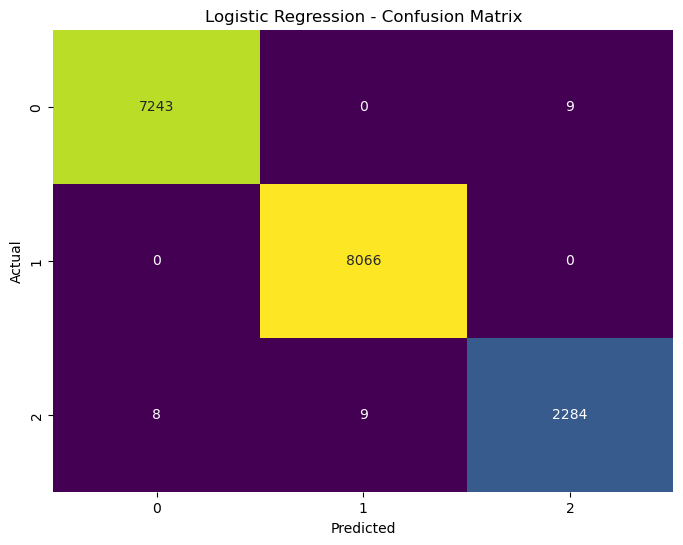


🔧 Training Random Forest...

🔍 Random Forest Accuracy: 0.9992


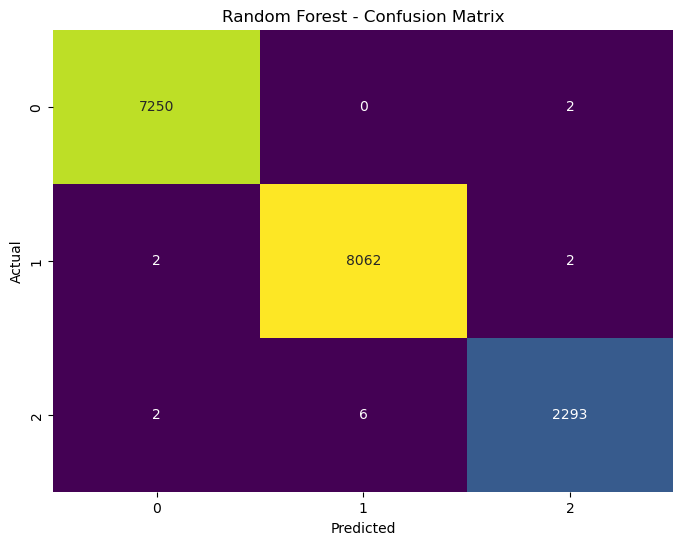


🔧 Training XGBoost...


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:26:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



🔍 XGBoost Accuracy: 0.9994


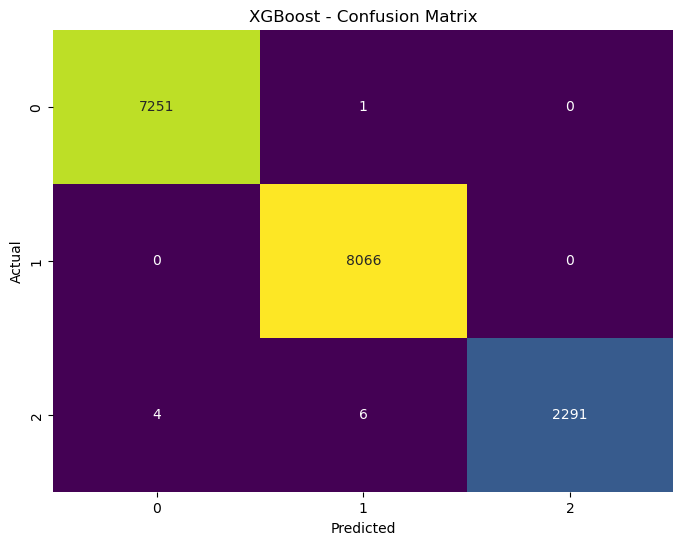


✅ Best Model: XGBoost with Accuracy: 0.9994


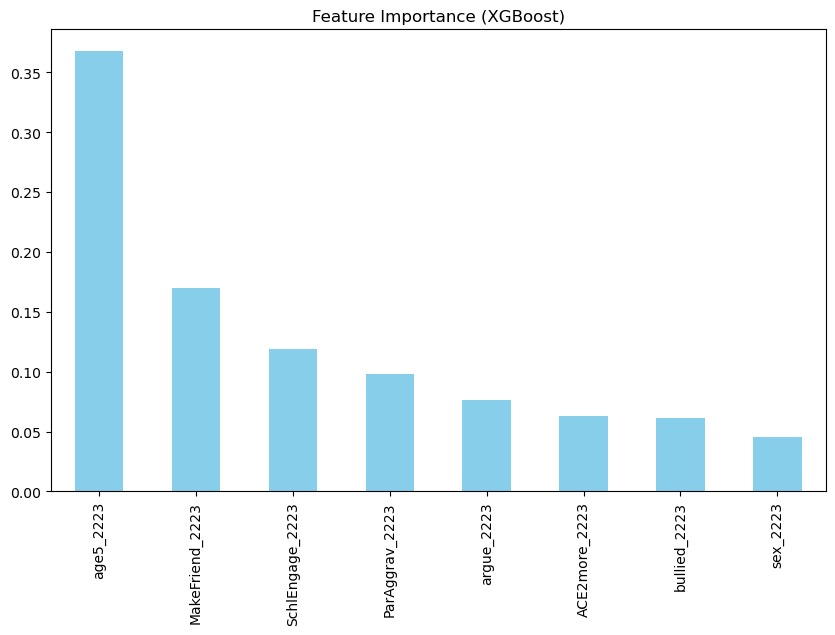


✅ Best model and scaler saved as 'best_adhd_model.pkl' and 'scaler.pkl'


In [323]:
# ADHD Severity Prediction Model (0-2)

import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Load Data
data = pd.read_csv('/Users/user/Desktop/Data Science Projects/ADHD_Divorce/results/ADHD_Severity_Expanded.csv')

# Step 2: Preparing Features and Target
selected_features = [
    'SchlEngage_2223', 'sex_2223', 'argue_2223', 
    'age5_2223', 'ParAggrav_2223', 'bullied_2223', 
    'ACE2more_2223', 'MakeFriend_2223'
]
X = data[selected_features]
y = data['ADHD_Severity_Expanded'] - 1  # Convert to 0-2 for model training

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 4: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Model Training and Evaluation
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

model_performance = {}
trained_models = {}

def evaluate_model(model_name, model, X_test, y_test):
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"\n🔍 {model_name} Accuracy: {accuracy:.4f}")
    
    # Confusion Matrix Plot
    cm = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='viridis', fmt='d', cbar=False)
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    model_performance[model_name] = accuracy
    return model

# Training and Evaluating All Models
for model_name, model in models.items():
    print(f"\n🔧 Training {model_name}...")
    model.fit(X_train_scaled, y_train)
    trained_models[model_name] = evaluate_model(model_name, model, X_test_scaled, y_test)

# Identifying Best Model
best_model_name = max(model_performance, key=model_performance.get)
print(f"\n✅ Best Model: {best_model_name} with Accuracy: {model_performance[best_model_name]:.4f}")
best_model = trained_models[best_model_name]

# Step 6: Saving the Best Model and Scaler
with open('/Users/user/Desktop/Data Science Projects/ADHD_Divorce/results/best_adhd_model.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)

with open('/Users/user/Desktop/Data Science Projects/ADHD_Divorce/results/scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

# Feature Importance (If Random Forest or XGBoost)
if best_model_name in ["Random Forest", "XGBoost"]:
    importance = best_model.feature_importances_
    feature_importance = pd.Series(importance, index=selected_features).sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    feature_importance.plot(kind='bar', color='skyblue')
    plt.title(f'Feature Importance ({best_model_name})')
    plt.show()

print("\n✅ Best model and scaler saved as 'best_adhd_model.pkl' and 'scaler.pkl'")


In [331]:
import streamlit as st
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

# Load the trained model and scaler
model = pickle.load(open('/Users/user/Desktop/Data Science Projects/ADHD_Divorce/results/best_adhd_model.pkl', 'rb'))
scaler = pickle.load(open('/Users/user/Desktop/Data Science Projects/ADHD_Divorce/results/scaler.pkl', 'rb'))

st.title('ADHD Severity Prediction (1-3)')
st.markdown("""
This tool allows parents to enter their child's information and receive a prediction for ADHD severity on a scale of 1 to 3.
- **3 = Very Compromised**
- **1 = Safe**

### Please enter your child's information:
""")

# User Inputs for the 8 Selected Features
SchlEngage = st.slider("School Engagement (1-5)", 1, 5, 3)
sex = st.selectbox("Child's Sex (0 = Female, 1 = Male)", [0, 1])
argue = st.slider("Argument Frequency (1-5)", 1, 5, 3)
age = st.slider("Child's Age (5-18)", 5, 18, 10)
ParAggrav = st.slider("Parental Aggravation (0-1)", 0, 1, 0)
bullied = st.slider("Bullied (0 = No, 1 = Yes)", 0, 1, 0)
ACE2more = st.slider("Adverse Childhood Experiences (2 or more) (0 = No, 1 = Yes)", 0, 1, 0)
MakeFriend = st.slider("Difficulty Making Friends (1-5)", 1, 5, 3)

# Prediction Button
if st.button("Predict ADHD Severity"):
    # Preparing input data for prediction
    input_data = pd.DataFrame([{
        'SchlEngage_2223': SchlEngage,
        'sex_2223': sex,
        'argue_2223': argue,
        'age5_2223': age,
        'ParAggrav_2223': ParAggrav,
        'bullied_2223': bullied,
        'ACE2more_2223': ACE2more,
        'MakeFriend_2223': MakeFriend
    }])

    # Scaling the input data
    scaled_data = scaler.transform(input_data)
    prediction = model.predict(scaled_data)[0]
    severity = int(prediction + 1)  # Convert from 0-2 to 1-3

    st.subheader(f"Predicted ADHD Severity: {severity} (1-3)")

    # Confusion Matrix
    st.markdown("### Model Confusion Matrix")
    fig, ax = plt.subplots()
    cm = pd.read_csv('confusion_matrix.csv', index_col=0)
    sns.heatmap(cm, annot=True, cmap='viridis', fmt='d', cbar=False, ax=ax)
    st.pyplot(fig)

    # Feature Importance Plot
    st.markdown("### Feature Importance")
    feature_importance = pd.read_csv('feature_importance.csv', index_col=0)
    fig2, ax2 = plt.subplots()
    feature_importance.plot(kind='bar', ax=ax2, color='skyblue')
    st.pyplot(fig2)
